In [58]:
import numpy as np 
from sympy import *
from sympy.abc import y
import matplotlib.pyplot as plt
plt.rcParams.update({"xtick.top": True , "ytick.right": True,
                     "xtick.minor.visible": True, "ytick.minor.visible": True,
                     "xtick.direction": "in" , "ytick.direction": "in",
                     "axes.labelsize": "large", "text.usetex": True, "font.size": 13
                     })

In [64]:
l1 = Matrix([[0,1,0],[1,0,0],[0,0,0]])
l2 = Matrix([[0,-1j,0],[1j,0,0],[0,0,0]])
l4 = Matrix([[0,0,1],[0,0,0],[1,0,0]])
l5 = Matrix([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = Matrix([[0,0,0],[0,0,1],[0,1,0]])
l7 = Matrix([[0,0,0],[0,0,-1j],[0,1j,0]])
l3 = Matrix([[1,0,0],[0,-1,0],[0,0,0]])
l8 = 1/sqrt(3) * Matrix([[1,0,0],[0,1,0],[0,0,-2]])

Ip = (l1 + 1j*l2)/2
Im = (l1 - 1j*l2)/2
Vp = (l4 + 1j*l5)/2
Vm = (l4 - 1j*l5)/2
Up = (l6 + 1j*l7)/2
Um = (l6 - 1j*l7)/2
operators = [1,Ip,Im,Vp,Vm,Up,Um]
operator_names = ["", "$I_+$","$I_-$","$V_+$","$V_-$","$U_+$","$U_-$"]

I3 = l3/2
Y = 1/sqrt(3) * l8

u = Matrix([1,0,0])
d = Matrix([0,1,0])
s = Matrix([0,0,1])
quarks = np.array([u,d,s])
quark_names = [r"$|u\rangle$",r"$|d\rangle$",r"$|s\rangle$"]
quark_colors = ["b","g","r"]

com = lambda A,B: A*B - B*A
eigenval = lambda A,x: solve(A*x - y *x,y)[y]
getY = lambda x: eigenval(Y,x)
getI3 = lambda x: eigenval(I3,x)
getX = lambda x: np.array([getI3(x), getY(x)])

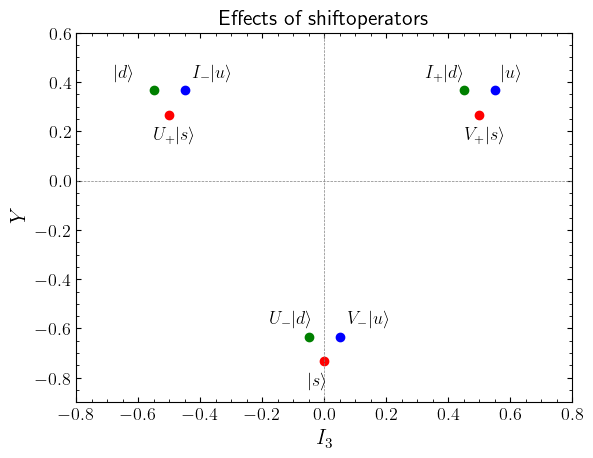

In [72]:
fig,ax = plt.subplots()
for quark,name,color in zip(quarks,quark_names,quark_colors):
    t = 0.1 * getX(quark) 
    for op,op_name in zip(operators,operator_names):
        rot = op*quark
        if rot == 0*u: continue
        ax.scatter(*(getX(rot)+t), c=color)
        ax.text(*(getX(rot)+2.5*t-[0.05,0]), op_name+name)
plt.axhline(0,linestyle="--",c="gray",linewidth=0.5)
plt.axvline(0,linestyle="--",c="gray",linewidth=0.5)
ax.set(xlabel="$I_3$",ylabel="$Y$",xlim=(-0.8,0.8),ylim=(-0.9,0.6),title="Effects of shiftoperators")
plt.savefig("effects_of_shiftoperators.svg")

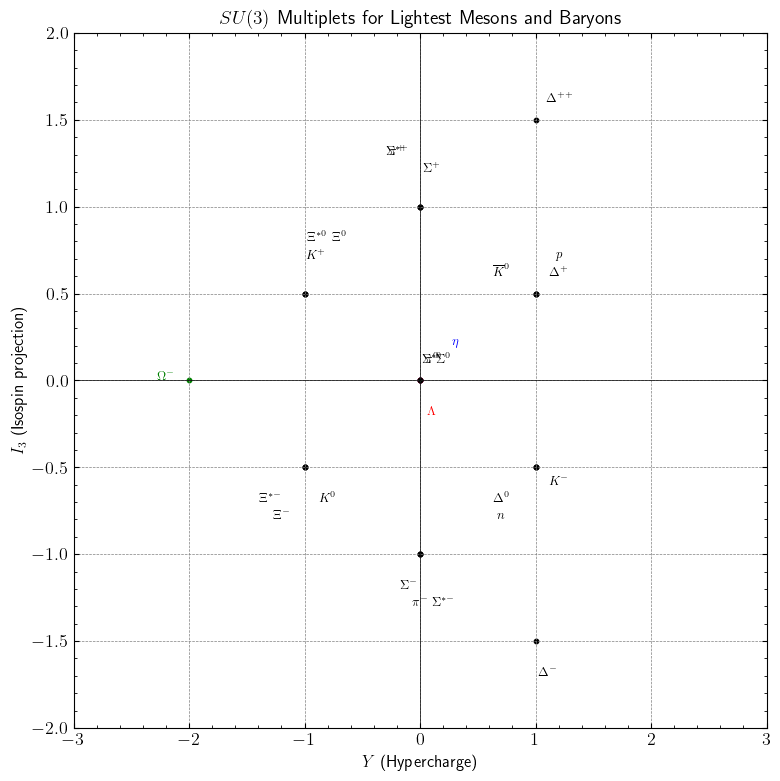

In [81]:
import matplotlib.pyplot as plt

# Function to add a particle to the plot
def add_particle(ax, x, y, label, offset=(0, 0), color='black', size=10):
    ax.scatter(x, y, c=color, s=size)
    ax.text(x + offset[0], y + offset[1], label, ha='center', fontsize=9, color=color)

# Adjusted positions for particle name
ru = (0.1,0.2)
rd = (0.1,-0.2)
lu = (0.1,0.2)
ld = (-0.1,0.2)

l = (-0.2,0)
r = (0.2,0)
u = (0,0.2)
d = (0,-0.2)
adjusted_positions = {
    # Mesons - Octet
    r"$K^+$": (0.1, 0.2), r"$K^0$": (0.2, -0.2),
    r"$\pi^+$": (-0.2, 0.3), r"$\pi^0$": (0.1, 0.1), r"$\pi^-$": (0, -0.3),
    r"$\overline{K}^0$": (-0.3, 0.1), r"$K^-$": (0.2, -0.1),
    r"$\eta$": (0.3, 0.2),
    
    # Baryons - Octet
    r"$p$": (0.2, 0.2), r"$n$": (-0.3, -0.3),
    r"$\Sigma^+$": (0.1, 0.2), r"$\Sigma^0$": (0.2, 0.1), r"$\Sigma^-$": (-0.1, -0.2),
    r"$\Xi^0$": (0.3, 0.3), r"$\Xi^-$": (-0.2, -0.3),
    r"$\Lambda$": (0.1, -0.2),
    
    # Baryons - Decuplet
    r"$\Delta^{++}$": (0.2, 0.1), r"$\Delta^+$": (0.2, 0.1),
    r"$\Delta^0$": (-0.3, -0.2), r"$\Delta^-$": rd,
    r"$\Sigma^{*+}$": (-0.2, 0.3), r"$\Sigma^{*0}$": (0.1, 0.1),
    r"$\Sigma^{*-}$": (0.2, -0.3),
    r"$\Xi^{*0}$": (0.1, 0.3), r"$\Xi^{*-}$": (-0.3, -0.2),
    r"$\Omega^-$": l
}

# Particle data
particles = [
    # Mesons - Octet
    (-1, 0.5, r"$K^+$"), (-1, -0.5, r"$K^0$"),  # Kaons (Y = 1)
    (0, 1, r"$\pi^+$"), (0, 0, r"$\pi^0$"), (0, -1, r"$\pi^-$"),  # Pions (Y = 0)
    (1, 0.5, r"$\overline{K}^0$"), (1, -0.5, r"$K^-$"),  # Kaons (Y = -1)
    (0, 0, r"$\eta$", 'blue'),  # Eta (highlighted)
    
    # Baryons - Octet
    (1, 0.5, r"$p$"), (1, -0.5, r"$n$"),  # Proton & Neutron (Y = 1)
    (0, 1, r"$\Sigma^+$"), (0, 0, r"$\Sigma^0$"), (0, -1, r"$\Sigma^-$"),  # Sigmas (Y = 0)
    (-1, 0.5, r"$\Xi^0$"), (-1, -0.5, r"$\Xi^-$"),  # Xis (Y = -1)
    (0, 0, r"$\Lambda$", 'red'),  # Lambda (highlighted)
    
    # Baryons - Decuplet
    (1, 1.5, r"$\Delta^{++}$"), (1, 0.5, r"$\Delta^+$"), (1, -0.5, r"$\Delta^0$"), (1, -1.5, r"$\Delta^-$"),  # Deltas (Y = 1)
    (0, 1, r"$\Sigma^{*+}$"), (0, 0, r"$\Sigma^{*0}$"), (0, -1, r"$\Sigma^{*-}$"),  # Sigma stars (Y = 0)
    (-1, 0.5, r"$\Xi^{*0}$"), (-1, -0.5, r"$\Xi^{*-}$"),  # Xi stars (Y = -1)
    (-2, 0, r"$\Omega^-$", 'green')  # Omega (highlighted)
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Set axes for Y (hypercharge) and I3 (isospin projection)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_xlabel(r"$Y$ (Hypercharge)", fontsize=12)
ax.set_ylabel(r"$I_3$ (Isospin projection)", fontsize=12)
ax.set_title(r"$SU(3)$ Multiplets for Lightest Mesons and Baryons", fontsize=14)

# Add particles to the plot
for x, y, label, *opt in particles:
    color = opt[0] if opt else 'black'
    offset = adjusted_positions.get(label, (0, 0))
    add_particle(ax, x, y, label, offset=offset, color=color)

# Grid and styling
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
fig.savefig("Mesons_Baryons.pdf")

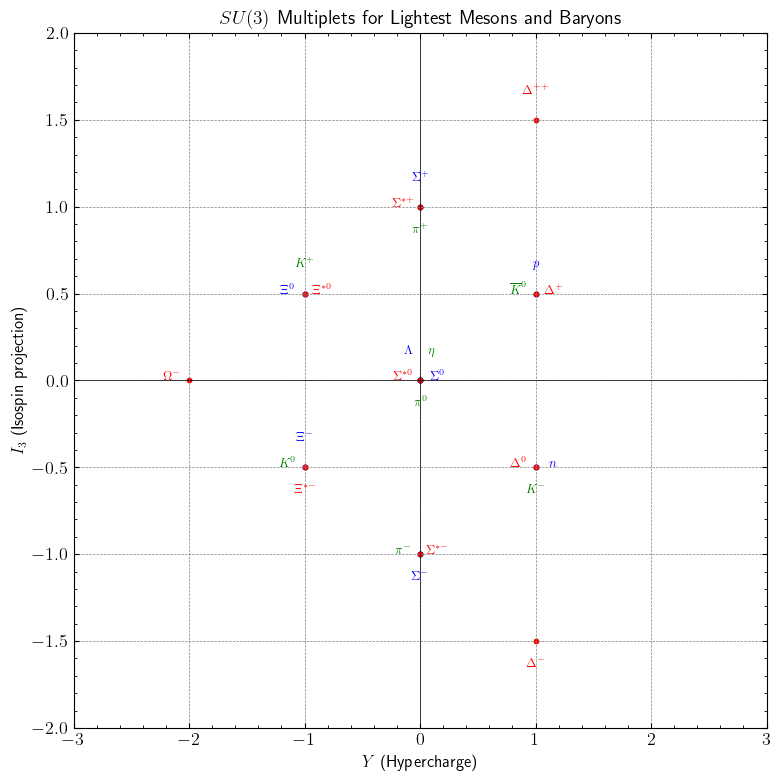

In [123]:
import matplotlib.pyplot as plt

def add_particle(ax, x, y, label, offset=(0, 0), color='black', size=10):
    ax.scatter(x, y, c=color, s=size)
    ax.text(x + offset[0], y + offset[1], label, ha='center', fontsize=9, color=color)

shifts = {
    'ru': (0.1, 0.15), 'rd': (0.1, -0.2), 
    'lu': (-0.1, 0.15), 'ld': (-0.2, -0.1),
    'l': (-0.15, 0), 'r': (0.15, 0), 
    'u': (0, 0.15), 'd': (0, -0.15)
}

particles = [
    # Mesons - Octet
    (-1, 0.5, r"$K^+$", 'green', 'u'), (-1, -0.5, r"$K^0$", 'green', 'l'),  # Kaons (Y = 1)
    (0, 1, r"$\pi^+$", 'green', 'd'), (0, 0, r"$\pi^0$", 'green', 'd'), (0, -1, r"$\pi^-$", 'green', 'l'),  # Pions (Y = 0)
    (1, 0.5, r"$\overline{K}^0$", 'green', 'l'), (1, -0.5, r"$K^-$", 'green', 'd'),  # Kaons (Y = -1)
    (0, 0, r"$\eta$", 'green', 'ru'),
    
    # Baryons - Octet
    (1, 0.5, r"$p$", 'blue', 'u'), (1, -0.5, r"$n$", 'blue', 'r'),  # Proton & Neutron (Y = 1)
    (0, 1, r"$\Sigma^+$", 'blue', 'u'), (0, 0, r"$\Sigma^0$", 'blue', 'r'), (0, -1, r"$\Sigma^-$", 'blue', 'd'),  # Sigmas (Y = 0)
    (-1, 0.5, r"$\Xi^0$", 'blue', 'l'), (-1, -0.5, r"$\Xi^-$", 'blue', 'u'),  # Xis (Y = -1)
    (0, 0, r"$\Lambda$", 'blue', 'lu'),
    
    # Baryons - Decuplet
    (1, 1.5, r"$\Delta^{++}$", 'red', 'u'), (1, 0.5, r"$\Delta^+$", 'red', 'r'), 
    (1, -0.5, r"$\Delta^0$", 'red', 'l'), (1, -1.5, r"$\Delta^-$", 'red', 'd'),  # Deltas (Y = 1)
    (0, 1, r"$\Sigma^{*+}$", 'red', 'l'), (0, 0, r"$\Sigma^{*0}$", 'red', 'l'), 
    (0, -1, r"$\Sigma^{*-}$", 'red', 'r'),  # Sigma stars (Y = 0)
    (-1, 0.5, r"$\Xi^{*0}$", 'red', 'r'), (-1, -0.5, r"$\Xi^{*-}$", 'red', 'd'),  # Xi stars (Y = -1)
    (-2, 0, r"$\Omega^-$", 'red', 'l')  # Omega (Y = -2)
]

fig, ax = plt.subplots(figsize=(8, 8))

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_xlabel(r"$Y$ (Hypercharge)", fontsize=12)
ax.set_ylabel(r"$I_3$ (Isospin projection)", fontsize=12)
ax.set_title(r"$SU(3)$ Multiplets for Lightest Mesons and Baryons", fontsize=14)

for x, y, label, color, shift_key in particles:
    offset = shifts.get(shift_key, (0, 0)) 
    add_particle(ax, x, y, label, offset=offset, color=color)

ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

fig.savefig("tmp.pdf")